<a href="https://colab.research.google.com/github/natbugreal/datascience/blob/main/Unit_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Will Lamine Yamal score 3 of his goals from outside of the 18-yard box in the 2024-2025 LA LIGA season?

First, I will make sure my preliz, numpy, arviz, and pymc have definitions. this is crucial order to minimize error in my code, also this will make it easier to abbreviate while working with such a crowded and foggy LOC.  

In [ ]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


# Context + Prior
As a common indulger in European football, I've taken the liberty of self claiming myself as well-versed enough to make a prediction based on just that. Lamine Yamal is a 17-year-old Spanish footballer, who became popular this year during the 2024 EUROS (a battle royale style football tournament where all european national teams compete to win the title of the best in europe) when he famously joked that he was in such schedule where he was playing a professional football match at 9:00 AM only to return to his hotel room at 12:00 PM to turn in his Caculus homework on time in order to recieve full marks. Not only did he make a name for himself in his incredible achievements at such a young age, he also made a BIG appearance against Germany when he scored a game winning goal from 20 yards out to send spain to the EURO Finals, Where Spain eventually beat England in order to win the 2024 Euro title.

With this context, I've created my prior. I will plot that Lamine Yamal will score 3 goals from outside the 18-yard-box out of his 9 goals scored in one single LA LIGA season. Ive created this prior because of how difficult it is for someone to score 9 goals, i believe it falls perfectly within his skill level, it also has to do with his position, i anticipate he will have many chances on goal from outside the box, howver he will only make a small percentage of the strikes he takes.

<Axes: >

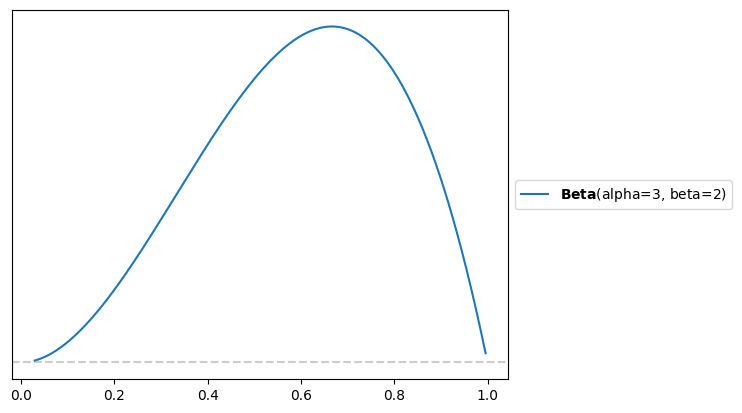

In [ ]:
#plotting the beta distribution with shape parameter 3 and scale parameter 9
pz.Beta(alpha=3,beta=2).plot_pdf()

<Axes: title={'center': 'θ'}>

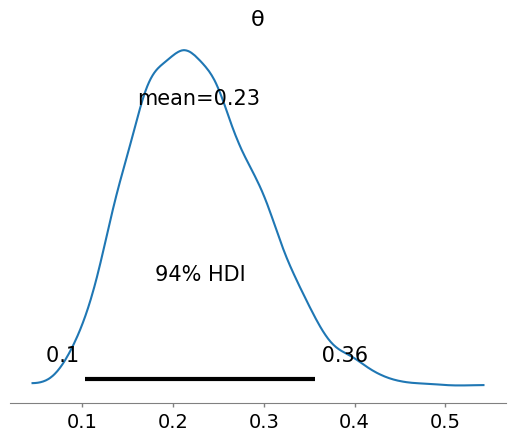

In [ ]:
#Lamine Yamal goals over his career, From outside the 18, Followed by goals from inside the 18
OBG_data = np.repeat([1,0], repeats = [5,18])


with pm.Model() as Yamal_OBG_model:
  #same prior from before based on career data
  θ = pm.Beta('θ' , alpha = 3. , beta = 9.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = OBG_data)

  #sample from the posterior, 2000 for a more precise picture later
  idata_OBG = pm.sample(2000)

#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_OBG)

# Posterior
After running the test using Lamine Yamals career stats, its depicted that the mean average of Lamine Yamal goals from outside of the 18-yard-box is 23%. Im thrilled to find this out because our graph also shows that it is 94% likely for Lamine Yamal to score between 1 and 4 goals from outside the 18-yard-box in a single LA LIGA season. This graph is not similar to mine,because my graph is centered near 0.6 and the data graph is centered over 0.24, however this still concludes my prediction that lamine yamal will score 3 goals from outside of the 18 this season. This statistic is very impressive conidering his age and dedication to his studies. While this data is fun to analyze, it is not a promise or guarantee goal count. This is merely an accurate prediction using data from his recorded career statistics.